In [55]:
import matplotlib.pyplot as plt
import random
from itertools import combinations
from itertools import permutations
import numpy as np

Prerequisite

In [2]:
li = list(zip(range(0, 51), range(0, 51)))
print(li[0])
print(li[-1])

(0, 0)
(50, 50)


In [3]:
# Unzip a Sequence
x, y = zip(*li)

print(x)
print(y)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50)


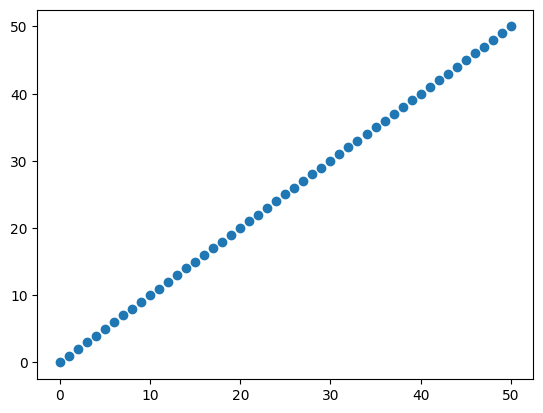

In [4]:
plt.scatter(x, y)
# or plt.scatter(*zip(*li))

In [5]:
letters ="GeEK"
 
# size of combination is set to 3
a = combinations(letters, 2)
print(a)

y = [' '.join(i) for i in a]
 
print(y)

['G e', 'G E', 'G K', 'e E', 'e K', 'E K']


Start from here

Randomly find 4 points within the range, the last point is the hub

In [6]:
max_range = 50
min_range = 2
num_dest = 3
points = []
for i in range(num_dest+1):
    points.append((random.randint(min_range,max_range+1), random.randint(min_range,max_range+1)))
print(points)

[(29, 5), (12, 23), (5, 25), (46, 19)]


In [7]:
def generate_points(num_dest, min_range, max_range):
    points = []
    for i in range(num_dest+1):
        points.append((random.randint(min_range,max_range+1), random.randint(min_range,max_range+1)))
    return points

In [8]:
x, y = zip(*points)
print(x)
print(y)

(29, 12, 5, 46)
(5, 23, 25, 19)


In [9]:
def find_x_y_coord(points):
    return zip(*points)

In [10]:
d = ['1', '2']
d.append('b')
d

['1', '2', 'b']

Plot it and differentiate the destinations from the hub

(0.0, 52.0)

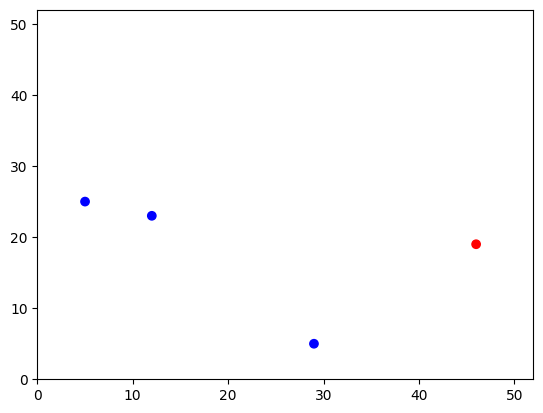

In [11]:
color = ['b' for i in range(num_dest)] # destinations
color.append('red') # hub

plt.scatter(x = x, y = y, c = color)
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])

Draw all possible paths

(0.0, 52.0)

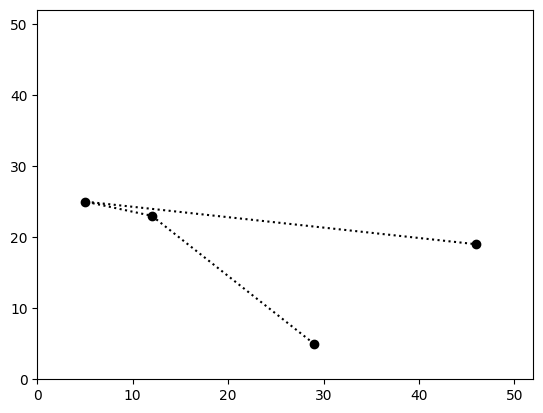

In [12]:
# [WRONG] 
plt.plot(list(x), list(y), linestyle=':',color='black',marker='o')
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])

In [13]:
# [CORRECT] 
a = combinations(points, 2)
points_combination = [i for i in a]
points_combination

[((29, 5), (12, 23)),
 ((29, 5), (5, 25)),
 ((29, 5), (46, 19)),
 ((12, 23), (5, 25)),
 ((12, 23), (46, 19)),
 ((5, 25), (46, 19))]

In [14]:
def find_all_paths(points):
    a = combinations(points, 2)
    return [i for i in a]

(0.0, 52.0)

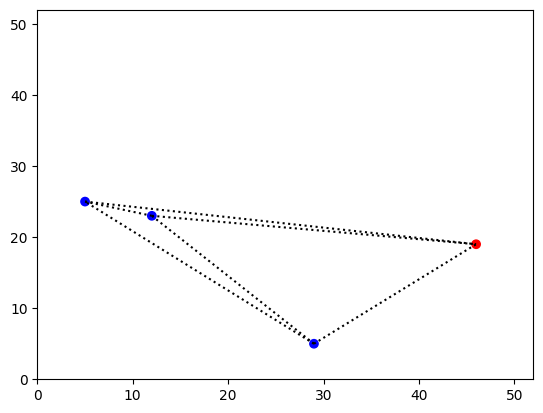

In [15]:
for point in points_combination:
    x_comb, y_comb = zip(*point)
    plt.plot(list(x_comb), list(y_comb), linestyle=':',color='black',marker=None)

# color points
plt.scatter(x = x, y = y, c = color, alpha=1.0)
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])

Calculate the distances of all possible paths

In [16]:
x

(29, 12, 5, 46)

In [17]:
y

(5, 23, 25, 19)

In [18]:
points

[(29, 5), (12, 23), (5, 25), (46, 19)]

In [19]:
points_combination

[((29, 5), (12, 23)),
 ((29, 5), (5, 25)),
 ((29, 5), (46, 19)),
 ((12, 23), (5, 25)),
 ((12, 23), (46, 19)),
 ((5, 25), (46, 19))]

In [20]:
def cal_dist(start, dest):
    return round(np.linalg.norm(np.array(start) - np.array(dest)), 1)

In [21]:
points_comb_dist = []
for i in points_combination:
    point_a = i[0]
    point_b = i[1]
    dist = cal_dist(point_a, point_b)
    points_comb_dist.append(dist)
print(points_comb_dist)

[24.8, 31.2, 22.0, 7.3, 34.2, 41.4]


Plot the distance values next to the lines

In [22]:
def make_graph(ax, paths, point_x_coord, point_y_coord, num_dest, type, x_max, y_max, x_min = 0, y_min = 0):
    
    for path in paths:
        x_to_x, y_to_y = zip(*path)
        ax.plot(list(x_to_x), list(y_to_y), linestyle=':',color='black',marker=None, linewidth=0.8)

        point_a = np.array(path[0])
        point_b = np.array(path[1])
        dist = cal_dist(point_a, point_b)

        loc_mid_line = (sum(x_to_x)/2, sum(y_to_y)/2)
        ax.text(loc_mid_line[0]-1, loc_mid_line[1], str(dist), ha = 'center')

    color = ['b' for i in range(num_dest)] # destinations
    color.append('red') # hub
        
    ax.scatter(x = point_x_coord, y = point_y_coord, c = color, alpha=1.0)
    ax.set_xlim([x_min, x_max+2])
    ax.set_ylim([y_min, y_max+2])

    if type == 'all':
        ax.set_title('All Possible Paths')
    elif type == 'best':
        ax.set_title('The Best Route')


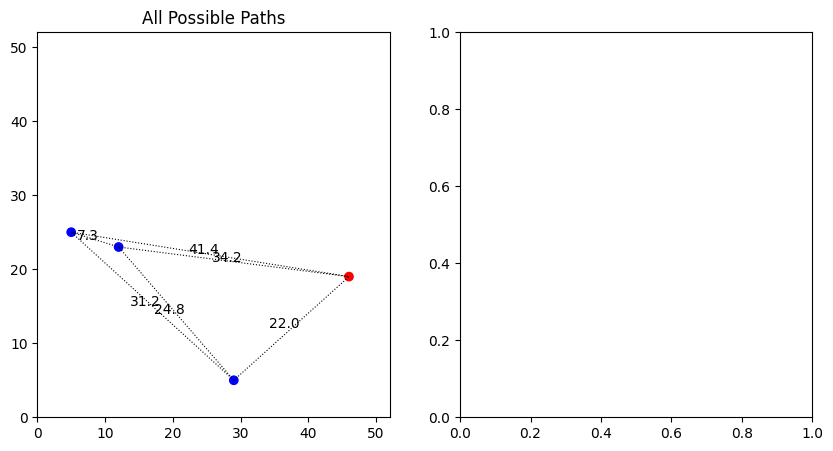

In [23]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

make_graph(ax[0], points_combination, point_x_coord = x, point_y_coord = y, 
           x_max = max_range, x_min = 0, 
           y_max = max_range, y_min = 0, 
           num_dest = num_dest, type = 'all')

For only 3 destinations with 1 vehicle, it is probably easy to spot the shortest route by manual examining. 

How to pragmatically find the shortest route, even though there are 50 destinations? (step 1) and more than 1 vehicle? (step 2)

In [24]:
points

[(29, 5), (12, 23), (5, 25), (46, 19)]

In [25]:
starting = points[-1]
destinations = points[:-1]
print(starting)
print(destinations)

(46, 19)
[(29, 5), (12, 23), (5, 25)]


In [26]:
def find_next_dest(origin, destinations):
    all_paths = [(idx, cal_dist(origin, v)) for idx, v in enumerate(destinations)]
    shortest_path_values = min(all_paths)
    shortest_path_idx = shortest_path_values[0]
    shortest_path = shortest_path_values[1]
    selected_dest = destinations[shortest_path_idx]
    return selected_dest, shortest_path

In [27]:
def find_best_route(points):
    starting = points[-1]
    destinations = points[:-1]

    total_dist = 0
    route = [starting]
    origin = starting

    while len(destinations) > 0:
        selected_dest, shortest_path = find_next_dest(origin, destinations)
        total_dist += shortest_path
        # add to the final route list
        route.append(selected_dest)
        # remove this round's destination from the unused destination list
        destinations.remove(selected_dest)
        # this round's destination becomes next round's original point
        origin = selected_dest

    # lastly, the last destination needs to go back to the very starting point
    route.append(starting)
    total_dist += cal_dist(selected_dest, starting)
    
    return route, total_dist

In [28]:
route, total_dist = find_best_route(points)

In [29]:
total_dist

95.5

Graph the route

In [30]:
route

[(46, 19), (29, 5), (12, 23), (5, 25), (46, 19)]

In [31]:
def route_to_path(route):
    return [(route[i], route[i+1]) for i in range(0, len(route)-1)]

In [32]:
route_3_dest = route_to_path(route)
route_3_dest

[((46, 19), (29, 5)),
 ((29, 5), (12, 23)),
 ((12, 23), (5, 25)),
 ((5, 25), (46, 19))]

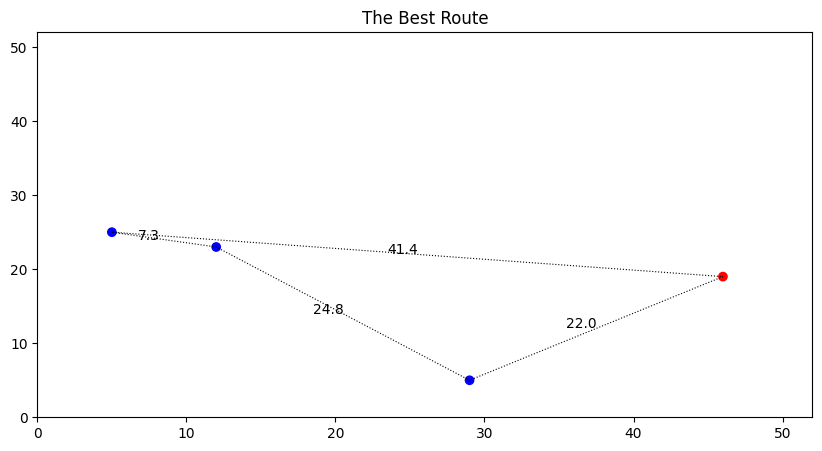

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
make_graph(ax, route_3_dest, point_x_coord = x, point_y_coord = y, 
           x_max = max_range, x_min = 0, 
           y_max = max_range, y_min = 0, 
           num_dest = num_dest, type = 'best')

Test a few more rounds

In [34]:
def run(max_range, num_dest):
    max_range = max_range
    num_dest = num_dest

    points = generate_points(num_dest = num_dest, min_range = 0, max_range = max_range)

    point_x_coord, point_y_coord = find_x_y_coord(points)

    route, total_dist = find_best_route(points)

    route_3_dest = route_to_path(route)

    # plot
    fig, ax = plt.subplots(1, 2, figsize=(10,5))

    # all possible paths
    make_graph(ax[0], find_all_paths(points), point_x_coord, point_y_coord, 
               x_max = max_range, x_min = 0, 
               y_max = max_range, y_min = 0, 
               num_dest = num_dest, type = 'all')

    # the best route
    make_graph(ax[1], route_3_dest, point_x_coord, point_y_coord, 
               x_max = max_range, x_min = 0, 
               y_max = max_range, y_min = 0, 
               num_dest = num_dest, type = 'best')

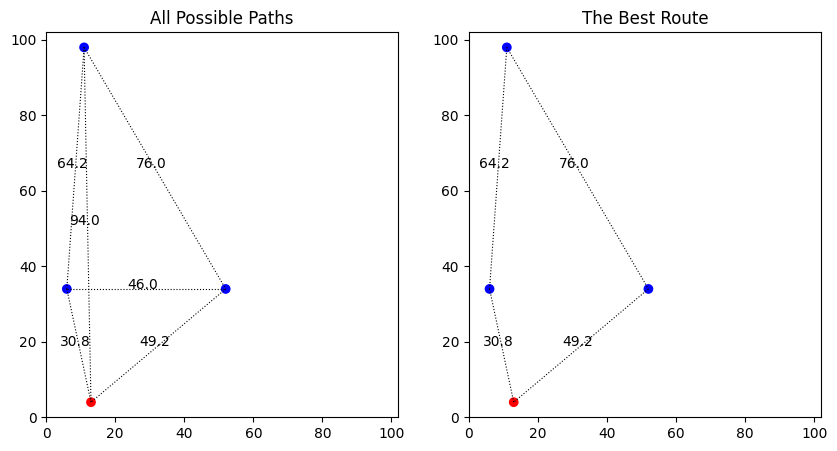

In [35]:
random.seed(123)

run(max_range=100, num_dest=3)

Above program only iterate once, it might *sometimes* work for 3 destinations. See reasons below.

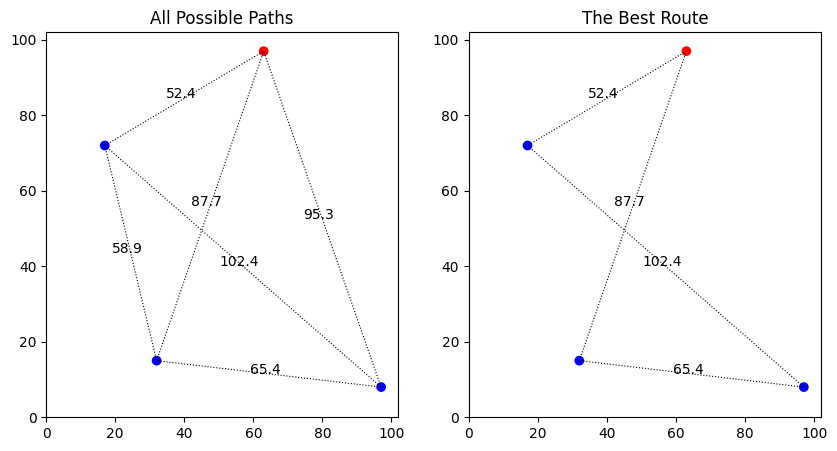

In [36]:
random.seed(1)

run(max_range=100, num_dest=3)

This failed to find the shortest path. This proves that only 1 iteration can't guarantee to find the best route. Let's take 4 destinations for another example.

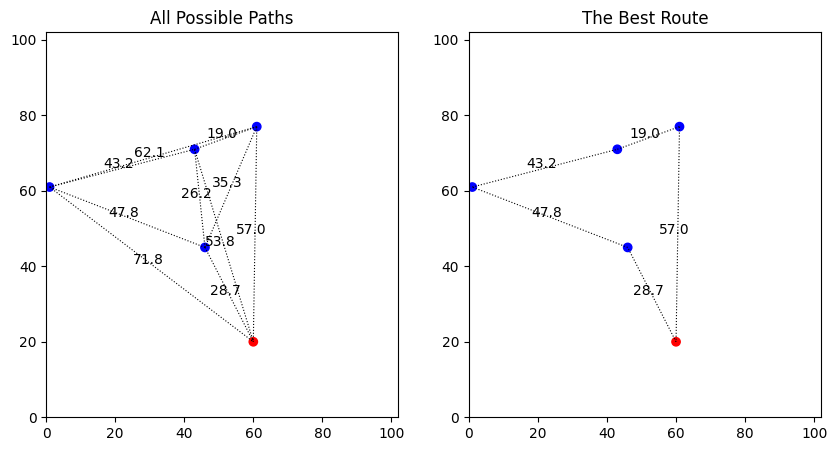

In [37]:
random.seed(5910)

run(max_range=100, num_dest=4)

One more 4 destinations

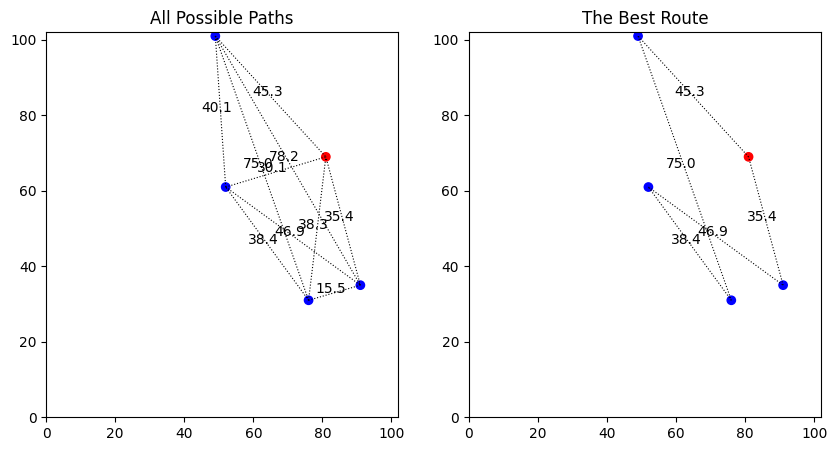

In [38]:
random.seed(110)

run(max_range=100, num_dest=4)

The best route is 18.1+36.7+20.8+55.9+64=195.5, which is clearly not the shortest route.

Modify the program

In [39]:
def find_best_route_v2(points):
    threshold = len(points)*(len(points)-1)*(len(points)-2)

    i = 0
    shortest_total_dist = 0

    # keep iterating until it hits the threshold
    while i < threshold:
        starting = points[-1]
        destinations = points[:-1]        
        total_dist = 0
        route = [starting]
        origin = starting

        while len(destinations) > 0:
            selected_dest, shortest_path = find_next_dest(origin, destinations)
            total_dist += shortest_path
            # add to the final route list
            route.append(selected_dest)
            # remove this round's destination from the unused destination list
            destinations.remove(selected_dest)
            # this round's destination becomes next round's original point
            origin = selected_dest
        
        # lastly, the last destination needs to go back to the very starting point
        route.append(starting)
        total_dist += cal_dist(selected_dest, starting)
        
        if i == 0:
            shortest_total_dist = total_dist
        elif shortest_total_dist > total_dist:
            shortest_total_dist = total_dist
            
        i += 1

    return route, total_dist

In [40]:
def run_v2(max_range, num_dest):
    max_range = max_range
    num_dest = num_dest

    points = generate_points(num_dest = num_dest, min_range = 0, max_range = max_range)

    point_x_coord, point_y_coord = find_x_y_coord(points)

    route, total_dist = find_best_route_v2(points)

    route_3_dest = route_to_path(route)

    # plot
    fig, ax = plt.subplots(1, 2, figsize=(10,5))

    # all possible paths
    make_graph(ax[0], find_all_paths(points), point_x_coord, point_y_coord, 
               x_max = max_range, x_min = 0, 
               y_max = max_range, y_min = 0, 
               num_dest = num_dest, type = 'all')

    # the best route
    make_graph(ax[1], route_3_dest, point_x_coord, point_y_coord, 
               x_max = max_range, x_min = 0, 
               y_max = max_range, y_min = 0, 
               num_dest = num_dest, type = 'best')

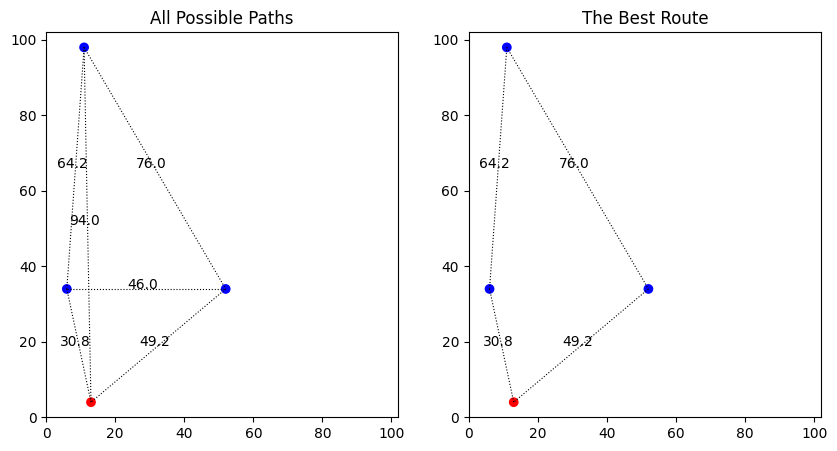

In [41]:
random.seed(123)

run_v2(max_range=100, num_dest=3)

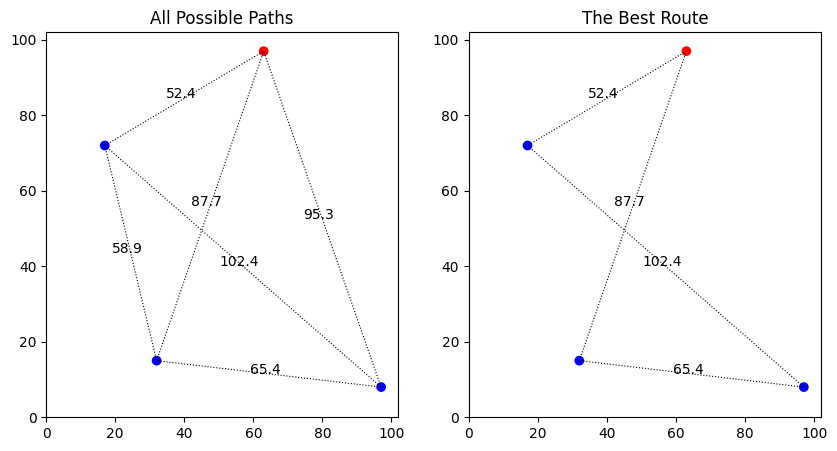

In [42]:
random.seed(1)

run_v2(max_range=100, num_dest=3)

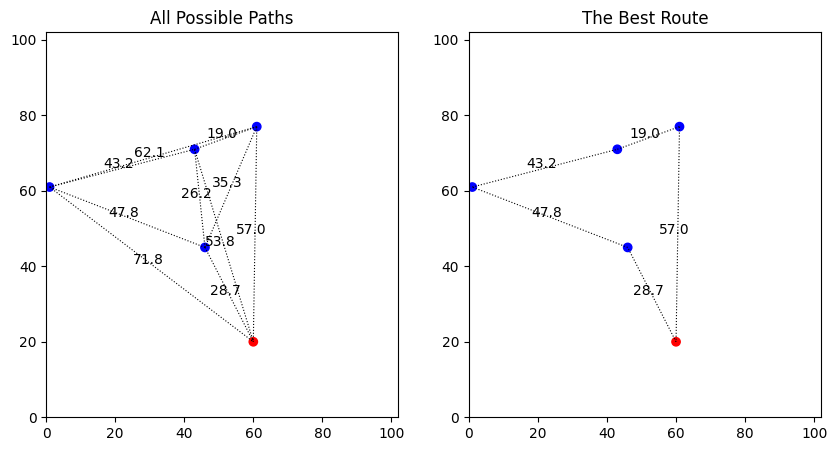

In [43]:
random.seed(5910)

run_v2(max_range=100, num_dest=4)

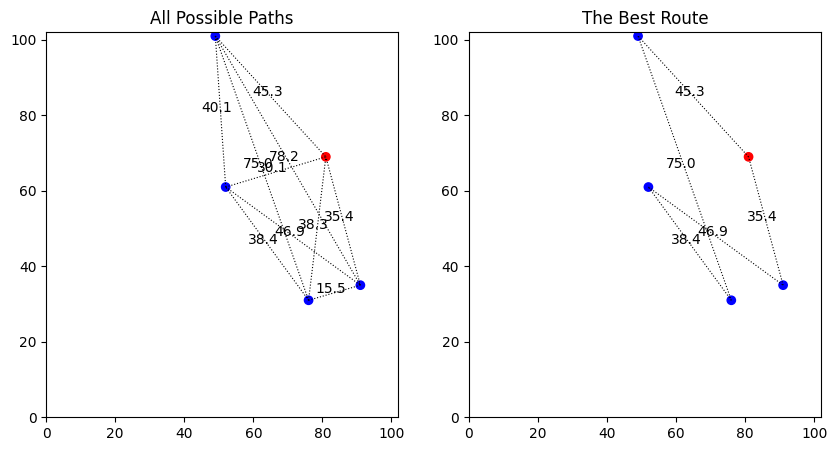

In [44]:
random.seed(110)

run_v2(max_range=100, num_dest=4)

No Improvements...

Try not to find the next best destination but go through all possibilities?

In [68]:
def find_best_route_v3(points):
    # find all possible routes 
    all_possible_routes = []
    depo = points[-1]
    
    for i in permutations(points[:-1]):
        possible_route = [depo]
        for j in i:
            possible_route.append(j)
        possible_route.append(depo)

        all_possible_routes.append(possible_route)    
    
    # go through every possible route
    shortest_total_dist = 0
    best_route = None
        
    for possible_route in all_possible_routes:    
        total_dist = 0

        for i in range(len(possible_route)-1):
            starting = possible_route[i]
            ending = possible_route[i+1]
            
            total_dist += cal_dist(starting, ending)
        
        if shortest_total_dist == 0 or shortest_total_dist > total_dist:
            shortest_total_dist = total_dist
            best_route = possible_route

    return best_route, shortest_total_dist

In [69]:
def run_v3(max_range, num_dest):
    max_range = max_range
    num_dest = num_dest

    points = generate_points(num_dest = num_dest, min_range = 0, max_range = max_range)

    point_x_coord, point_y_coord = find_x_y_coord(points)

    route, total_dist = find_best_route_v3(points)

    route_3_dest = route_to_path(route)

    # plot
    fig, ax = plt.subplots(1, 2, figsize=(10,5))

    # all possible paths
    make_graph(ax[0], find_all_paths(points), point_x_coord, point_y_coord, 
               x_max = max_range, x_min = 0, 
               y_max = max_range, y_min = 0, 
               num_dest = num_dest, type = 'all')

    # the best route
    make_graph(ax[1], route_3_dest, point_x_coord, point_y_coord, 
               x_max = max_range, x_min = 0, 
               y_max = max_range, y_min = 0, 
               num_dest = num_dest, type = 'best')

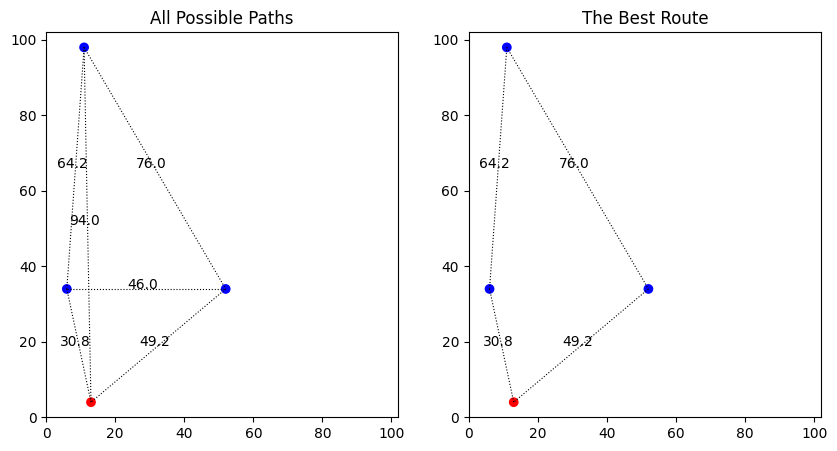

In [70]:
random.seed(123)

run_v3(max_range=100, num_dest=3)

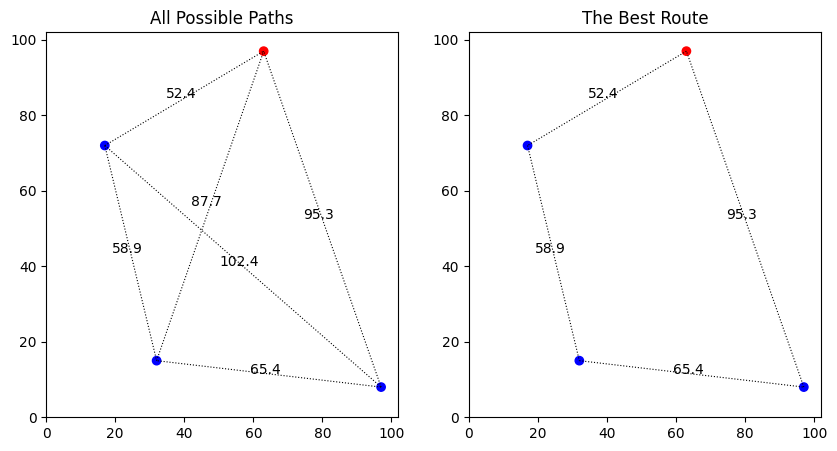

In [71]:
random.seed(1)

run_v3(max_range=100, num_dest=3)

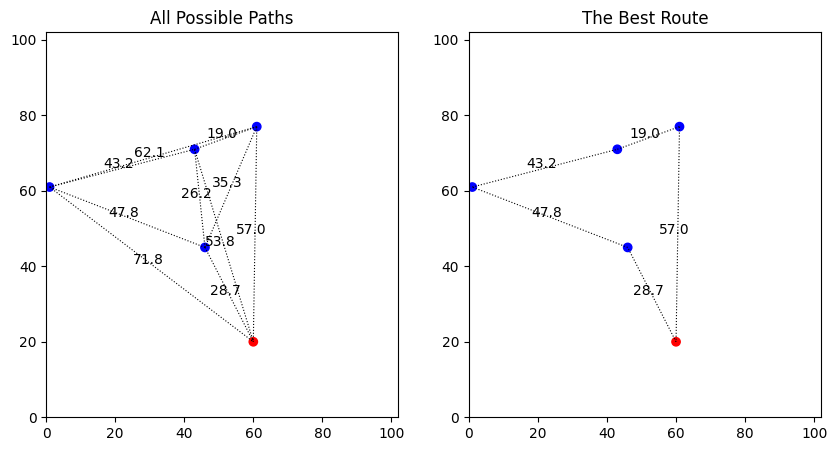

In [72]:
random.seed(5910)

run_v3(max_range=100, num_dest=4)

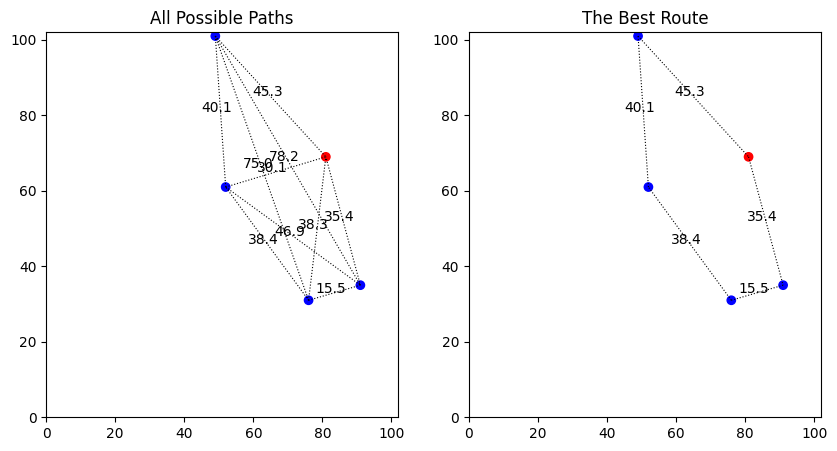

In [73]:
random.seed(110)

run_v3(max_range=100, num_dest=4)

It seems to work!